# Ford GoBike Ride Analysis For the Month of February
## by Godspower Iheanacho




## Investigation Overview

In this project i analysed the fordgobike datasets and explored the information about the rides made by individuals made in the month february 2019.for this analysis , pandas DataFrame were used. The following questions were answered during this project:
* Which of the day of week were most of the trips made.
* the number of user type
* How was the gender distributed.
* Was there any round trip etc.




## Dataset Overview

The datasets consists of information regarding about 183,412 rides made in the month of february.The datasets consists of about 16 features which includes the following:

* duration_sec : duration of trip made in seconds
* start_time : time trip started
* end_time : time trip ended.
* start_station_id: station id where trip started.
* end_station_id : station id where trip ended.
* start_station_latitude : the lattitude location of the station  where of the trip started
* end_station_latitude : latitude location of the station where the trip ended.
* end_station_longitude :longitude location of the station where the trip ended.
* start_station_latitude :longitude location of the station where the trip started.

* User_type : type of user(subscriber or customer)
* member_birth_year : Year which member were born
* member_gender : gender of member(male, female and other)
* bike_id : unique identifier of bike used for trips:

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_clean = pd.read_csv('bike_clean.csv')


In [3]:
bike_clean

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_longitude,end_station_id,end_station_name,end_station_longitude,...,start_year,start_month,start_day_of_week,start_hour,day,member_age,is_round_trip,age_group,time_of_day,duration_min
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),-122.400811,13,Commercial St at Montgomery St,-122.402923,...,2019,February,Thursday,17,28,35,No,Young Adults,noon,869.750000
1,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,-122.426826,3,Powell St BART Station (Market St at 4th St),-122.404904,...,2019,February,Thursday,12,28,47,No,Middle-age Adults,noon,1030.900000
2,3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,-122.446546,70,Central Ave at Fell St,-122.444293,...,2019,February,Thursday,17,28,30,No,Young Adults,noon,608.166667
3,4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,-122.271738,222,10th Ave at E 15th St,-122.248780,...,2019,February,Thursday,23,28,45,No,Middle-age Adults,night,26.416667
4,5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,-122.391198,323,Broadway at Kearny,-122.405950,...,2019,February,Thursday,23,28,60,No,Old Adults,night,29.883333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174947,183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,-122.391865,324,Union Square (Powell St at Post St),-122.408531,...,2019,February,Friday,0,1,23,No,Young Adults,morning,8.000000
174948,183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),-122.400811,66,3rd St at Townsend St,-122.392741,...,2019,February,Friday,0,1,35,No,Young Adults,morning,5.216667
174949,183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,-121.904888,277,Morrison Ave at Julian St,-121.908586,...,2019,February,Friday,0,1,29,No,Young Adults,morning,2.350000
174950,183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,-122.273422,216,San Pablo Ave at 27th St,-122.275698,...,2019,February,Friday,0,1,31,No,Young Adults,morning,2.316667


### Distribution of trip duration
The trip duration in this datasets  has a wide range of values  which could result to outliers, from about 1 to 1409. The trip duration is plotted on a logarithmic scale, the distribution takes a normal distribution.


In [4]:
bins = 10 ** np.arange(-1,3+0.1,0.1)
ticks = [0.1,0.3,1,3,10,50,100,300,1000]
## convert to ticks to strings
labels = ['{}'.format(v) for v in ticks]

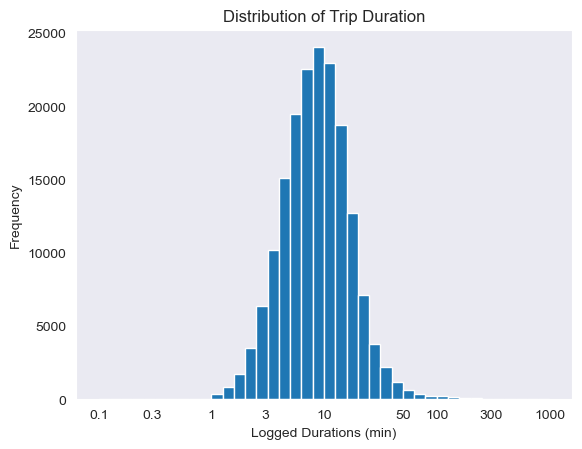

In [5]:

plt.hist(data=bike_clean,x='duration_min',bins=bins)
plt.title('Distribution of Trip Duration')

plt.xlabel('Logged Durations (min)')
plt.ylabel('Frequency')
plt.xscale('log')
plt.xticks(ticks,labels)
plt.show()

### Which day in the week was most trips made.
The day of the week was plotted on the countplot and we could see that most of the trip were made on the while there was low patronage during the weekend.

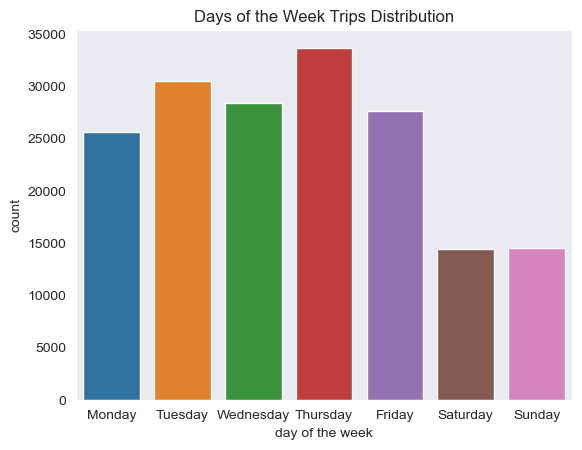

In [6]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

sns.countplot(data=bike_clean,x='start_day_of_week',order=day_order)
plt.xlabel('day of the week')
plt.title('Days of the Week Trips Distribution')
plt.show()

### Trip Distribution by time of the day

From the piechart we could that majority of the trips were made during the day(morning and noon)

In [7]:
time_of_day_counts=bike_clean['time_of_day'].value_counts(normalize=True)
time_of_day_counts

morning    0.385340
noon       0.383065
night      0.231595
Name: time_of_day, dtype: float64

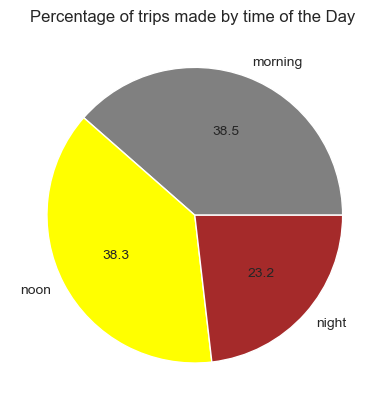

In [8]:
plt.pie(data=time_of_day_counts,
        labels=time_of_day_counts.index,
        x=time_of_day_counts.values,
       autopct='%1.1f',
       colors=['grey','yellow','brown'])
plt.title('Percentage of trips made by time of the Day ')
plt.show()

In [9]:
# create a function that plots a countplot
def plot_countplot(df,x,xlabel,title):
    sns.countplot(data=df, x=x)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

### Number of round trips made
From the countplot we could see that an overwhelming proportions of the trips made were not round trip

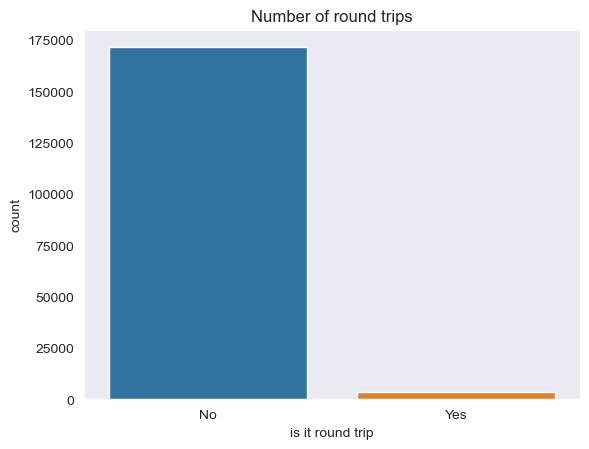

In [10]:
plot_countplot(bike_clean,'is_round_trip','is it round trip','Number of round trips')

### Distribution of genders that patronise ford Gobike
from the  graph the male gender made the highest number of trips than the other genders.

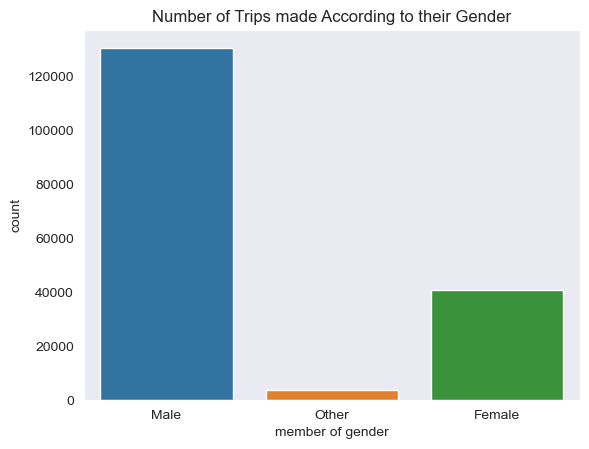

In [11]:
plot_countplot(bike_clean,'member_gender','member of gender','Number of Trips made According to their Gender')

### Number of trips by User type 
We can see that majority of those that patronise are mostly subscribers.

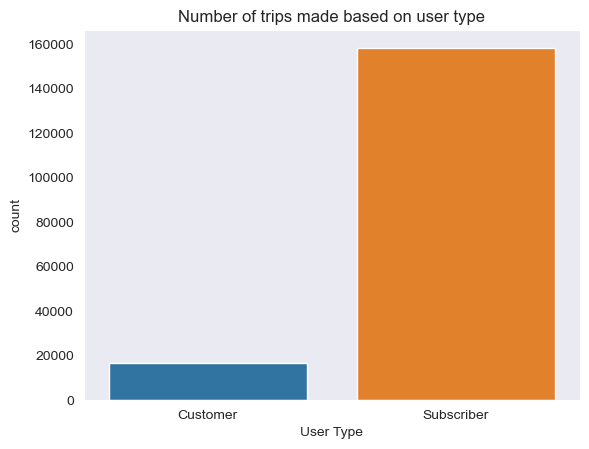

In [12]:
plot_countplot(bike_clean,'user_type','User Type', 'Number of trips made based on user type')

### Average Duration covered by Gender
The barplot shows the other other gender which does not include male and female has the highest average duration. This could bre partly down to the fact that section of gender made the least number of trips.

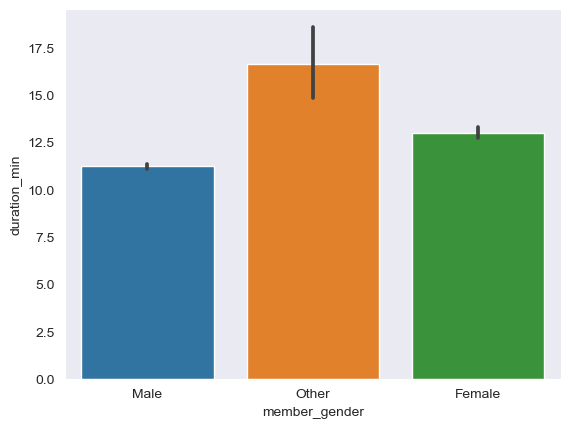

In [13]:
sns.barplot(data=bike_clean, x='member_gender',y='duration_min')

plt.show()

### Number of trips made by hours and Days of the week
from the above heatmap, we could see that most of trips were made between 7am and 9am and rapidly declines from 10am to 16 in the evening. This could be partly down to the fact that most of their have busy schedules during that time of the day. For much of the evening ie between from 17 to 18, activitiees pick-ups as most of their customers returns from work.

In [14]:
day_hour_count = bike_clean.groupby(['start_day_of_week','start_hour']).size().reset_index().rename(columns={0:'count'})
day_hour_count

,start_day_of_week,start_hour,count
0,Friday,0,144
1,Friday,1,79
2,Friday,2,63
3,Friday,3,29
4,Friday,4,42
...,...,...,...
163,Wednesday,19,1783
164,Wednesday,20,1147
165,Wednesday,21,868
166,Wednesday,22,507


In [15]:
heat=day_hour_count.pivot(index='start_hour',columns='start_day_of_week',values='count')

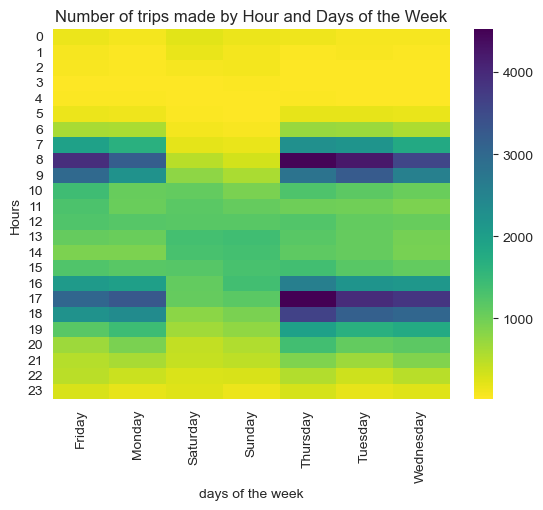

In [16]:
sns.heatmap(data=heat,cmap='viridis_r')
plt.title('Number of trips made by Hour and Days of the Week')
plt.ylabel('Hours')
plt.xlabel('days of the week')
plt.show()

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert presentation_slides.ipynb --to slides --post serve --no-input --no-prompt